<a href="https://colab.research.google.com/github/Parisa-Foroutan/Tutorials/blob/main/ADMI821_Session4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Session 4:** 

Find it on GitHub: https://github.com/Parisa-Foroutan/Tutorials/blob/main/ADMI821_Session4.ipynb

In this session [Feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection), cross-validation, Support Vector Machine, K-Nearest Neighbors, and Decision Tree models for Classification and Regression tasks will be presented. You can find the datasets here: [nasa.csv ](https://drive.google.com/file/d/1JPUOwwIuFbyIWPNyMCWj78S-CIuqb75d/view?usp=sharing) , [daily demand order](https://docs.google.com/spreadsheets/d/1dTLJDzJu_pG_IEStgT5RRI1VSeGgjEKH/edit?usp=sharing&ouid=117858513827551292983&rtpof=true&sd=true), [life expectance](https://drive.google.com/file/d/1F8bGNt7ZE7fINFkvTBITCfu1TqB_t5Re/view?usp=sharing), and [divorce descision](https://docs.google.com/spreadsheets/d/1cvpFwTfB3LnHK3MWVcYojF3doWc84dVE/edit?usp=sharing&ouid=117858513827551292983&rtpof=true&sd=true).

Import Libraries:

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model, feature_selection, metrics, naive_bayes

## Multiple Linear Regression

Read the Data:

In [93]:
# Forecasting_data = pd.read_csv("/content/Daily Demand Order (Forecasting) dated.csv") # Daily Demand Order dataset
Forecasting_data = pd.read_csv("/content/life_dexpectency.csv") # life_expectancy dataset

print(Forecasting_data.columns)
Forecasting_data.head(3)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [94]:
Forecasting_data.info()
Forecasting_data.dropna(inplace=True)
Forecasting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1990 non-null   object 
 1   Year                             1990 non-null   int64  
 2   Status                           1990 non-null   object 
 3   Life expectancy                  1983 non-null   float64
 4   Adult Mortality                  1983 non-null   float64
 5   infant deaths                    1990 non-null   int64  
 6   Alcohol                          1868 non-null   float64
 7   percentage expenditure           1990 non-null   float64
 8   Hepatitis B                      1731 non-null   float64
 9   Measles                          1990 non-null   int64  
 10  BMI                              1985 non-null   float64
 11  under-five deaths                1990 non-null   int64  
 12  Polio               

Split the data into train and test subsets (Note: Time series data cannot be randomly subsampled):

In [95]:
rate = 0.75
index = int(rate * len(Forecasting_data))

## using Daily Demand Order dataset

# X_train = Forecasting_data.iloc[:index, 1:-1]
# y_train = Forecasting_data.loc[:index-1, "Target (Total orders)"]
# X_test = Forecasting_data.iloc[index:, 1:-1]
# y_test = Forecasting_data.loc[index:, "Target (Total orders)"]

## using life expectency dataset
from sklearn.model_selection import train_test_split

X = Forecasting_data.iloc[:, 4:]
y = Forecasting_data.iloc[:, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

X_train.shape

(1184, 18)

Train linear regression model:

In [ ]:
# create linear regression object
linear_reg = linear_model.LinearRegression(fit_intercept=True)
# fit the linear regression model to your training data
linear_reg.fit(X_train, y_train)
print(f"intercept:{linear_reg.intercept_}\n")
print(f"Estiamted coefficients:{linear_reg.coef_}")

intercept:52.92982518120826

Estiamted coefficients:[-1.63085682e-02  9.20027038e-02 -5.88370037e-02  4.01446946e-04
 -8.02347094e-03 -3.69962565e-06  2.62973918e-02 -6.86938316e-02
  2.88861609e-03  1.89960362e-01  2.51294138e-02 -5.43107073e-01
  3.53216581e-06  1.97503726e-09 -4.67247847e-03 -6.58815005e-02
  1.02369941e+01  8.45064658e-01]


Linear Regression Equation:   $ŷ = β_{0} + \beta_{1} X_{1} + ...+ \beta_{k} X_{k}$

Test the prediction performance:

In [ ]:
y_pred = linear_reg.predict(X_test)

# using sklearn metrics
MSE_sk = metrics.mean_squared_error(y_test, y_pred)
print(f"MSE: {MSE_sk}") 
MAE_sk = metrics.mean_absolute_error(y_test, y_pred)
print(f"MAE: {MAE_sk}") 
MAPE_sk = metrics.mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {MAPE_sk}") 

MSE: 16.563185566874303
MAE: 2.917934375682162
MAPE: 0.04730566611233722


###Feature Selection Methods:

See documentations for [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) for more score functions.

In [ ]:
from sklearn.feature_selection import f_regression # to find the significance of each feature

f_statistic, p_values = f_regression(X_train,y_train)
print(p_values)

[6.42696702e-194 3.25722196e-023 1.08353239e-070 4.07331494e-054
 4.94979947e-014 2.80670015e-002 9.57629693e-102 7.36236431e-029
 6.81432382e-036 9.94536716e-018 7.20584729e-050 2.41172487e-109
 5.39171559e-063 9.24272537e-001 1.78743874e-079 5.64428556e-079
 3.57924190e-220 3.73922650e-220]


In [ ]:
from sklearn.feature_selection import SelectKBest, SelectFpr 

Selected = SelectKBest(f_regression, k=8).fit(X_train, y_train)  # Select features based on the k highest scores. You can try various values for k and select the best one.
# Selected = SelectFpr(f_regression, alpha=0.05).fit(X_train, y_train) # makes more sense for classification tasks 
print(f"selected features are: {Selected.get_feature_names_out()}")
X_selected = Selected.transform(X_train) # reduces X_train to the selected features.
X_selected.shape

selected features are: ['Adult Mortality' 'Alcohol' 'BMI' 'HIV/AIDS' ' thinness  1-19 years'
 ' thinness 5-9 years' 'Income composition of resources' 'Schooling']


(1184, 8)

In [ ]:
X_test_new = Selected.transform(X_test)
print(X_test_new[:2])
X_test.head(2)

[[1.44e+02 9.50e+00 5.55e+01 1.00e-01 2.30e+00 2.50e+00 7.97e-01 1.48e+01]
 [1.43e+02 9.19e+00 5.50e+01 1.00e-01 2.40e+00 2.50e+00 8.00e-01 1.55e+01]]


,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1457,144.0,2,9.50,79.415027,98.0,13,55.5,3,99.0,6.20,99.0,0.1,821.251569,38165445.0,2.3,2.5,0.797,14.8
1458,143.0,2,9.19,648.074345,98.0,11,55.0,3,99.0,6.19,99.0,0.1,6681.178818,38182222.0,2.4,2.5,0.800,15.5


Evaluate the new model's performance on the test set:

In [ ]:
linear_reg = linear_model.LinearRegression(fit_intercept=True)
# fit the linear regression model to your training data
linear_reg.fit(X_selected, y_train)
y_pred = linear_reg.predict(X_test_new)

# using sklearn metrics
MSE_sk = metrics.mean_squared_error(y_test, y_pred)
print(f"MSE: {MSE_sk}") 
MAE_sk = metrics.mean_absolute_error(y_test, y_pred)
print(f"MAE: {MAE_sk}") 
MAPE_sk = metrics.mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {MAPE_sk}") 

MSE: 17.242351829814798
MAE: 2.9958376963850792
MAPE: 0.04864516868304993


### Statistical Analysis of Linear Regression

In [ ]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train) #endog: dependent variable, exog: regressors
res = model.fit()
print(res.summary())

## Cross-validation: Logistic Regression

###Read the Data:

In [96]:
# Nasa Dataset
classification_data = pd.read_csv("/content/nasa.csv")
classification_data.head(3)

,Name,Eccentricity,Inclination,Neo Reference ID,Absolute Magnitude,Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Semi Major Axis,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3723955,0.351674,28.412996,3723955,21.3,479.225620,1071.581063,12784,7.890000e+11,18.113985,65210.34609,40519.17311,0.383014,148.992630,3,0.186935,5.457,1.107776,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,0
1,2446862,0.348248,4.237961,2446862,20.3,759.521423,1698.341531,12791,7.900000e+11,7.590711,27326.56018,16979.66180,0.050956,19.821890,0,0.043058,4.557,1.458824,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,1
2,3671135,0.563441,17.927751,3671135,19.6,1048.431420,2344.363926,12798,7.900000e+11,10.808844,38911.83825,24178.30305,0.392785,152.793274,1,0.272213,4.724,1.323532,178.971951,556.160556,0.577800,198.145969,2.069265,2458009.403,354.237368,0.647295,0


###Randomly split the data into train and test subsets

In [97]:
from sklearn.model_selection import train_test_split

X_c = classification_data.iloc[:, 1:-1] 
y_c = classification_data["Hazardous"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size = 0.2, random_state = 123)
print(f"Shape of X_train: {X_train_c.shape}") 

Shape of X_train: (369, 25)


Look for the scikit-learn cross-validation documentations [here](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values).

In [ ]:
from sklearn.model_selection import cross_val_score

# create classifier object
clf = linear_model.LogisticRegression()
# clf = naive_bayes.GaussianNB()

# fit classifier with 5-fold cross-validation
acc_scores = cross_val_score(clf,X_train_c, y_train_c, cv=5, scoring="accuracy") # https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values
print(f"accuracies:{acc_scores}")
print("%0.3f accuracy with a standard deviation of %0.3f" % (acc_scores.mean(), acc_scores.std()))

accuracies:[0.56756757 0.55405405 0.64864865 0.59459459 0.56164384]
0.585 accuracy with a standard deviation of 0.034


## Support Vector Machines (SVM)

SVM documentions are available [here](https://scikit-learn.org/stable/modules/svm.html).

Support Vector Regression (SVR):
Formulation are [here](https://scikit-learn.org/stable/modules/svm.html#svr).

In [98]:
from sklearn import svm

svr = svm.SVR(kernel ='rbf') # kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
svr_p = svm.SVR(kernel ='poly', degree=3, C=1.5)  
svr.fit(X_train, y_train)
svr_p.fit(X_train, y_train)
# svr.support_vectors_
print(f"Number of support vectors with rbf kernel: {svr.n_support_}")
print(f"Number of support vectors with polynomial kernel: {svr_p.n_support_}")

Number of support vectors with rbf kernel: [1166]
Number of support vectors with polynomial kernel: [1169]


In [99]:
y_pred = svr.predict(X_test)
y_pred_p = svr_p.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
mse_p = metrics.mean_squared_error(y_test, y_pred_p)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
mape_p = metrics.mean_absolute_percentage_error(y_test, y_pred_p)
print(f"MSE with rbf kernel: {mse}")
print(f"MSE with Polynomian degree 3 kernel: {mse_p}")
print(f"MAPE with rbf kernel: {mape}")
print(f"MAPE with Polynomian degree 3 kernel: {mape_p}")

MSE with rbf kernel: 90.37086219960835
MSE with Polynomian degree 3 kernel: 93.37119137800731
MAPE with rbf kernel: 0.11780200008700366
MAPE with Polynomian degree 3 kernel: 0.1192781423428543


Support Vector Classification (SVC):

Formulations are [here](https://scikit-learn.org/stable/modules/svm.html#svc).

In [100]:
svc = svm.SVC(kernel ='rbf', probability =True) # kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} 
svc_s = svm.SVC(kernel ='sigmoid', probability =True) 
svc.fit(X_train_c, y_train_c)
svc_s.fit(X_train_c, y_train_c)
probs = svc.predict_proba(X_test_c)
probs_s = svc_s.predict_proba(X_test_c)
probs[:10]

array([[0.63106041, 0.36893959],
       [0.62241716, 0.37758284],
       [0.63440886, 0.36559114],
       [0.5741725 , 0.4258275 ],
       [0.57035058, 0.42964942],
       [0.4144417 , 0.5855583 ],
       [0.61695313, 0.38304687],
       [0.62034088, 0.37965912],
       [0.5       , 0.5       ],
       [0.63828869, 0.36171131]])

In [104]:
y_pred_c = svc.predict(X_test_c)
y_pred_c_s = svc_s.predict(X_test_c)
print(y_pred_c[:10])

acc = metrics.accuracy_score(y_test_c, y_pred_c)
acc_s = metrics.accuracy_score(y_test_c, y_pred_c_s)

print(f"Accuracy with rbf kernel: {acc}")
print(f"Accuracy with sigmoid kernel: {acc_s}")

confusion = metrics.confusion_matrix(y_test_c, y_pred_c)
print(f"Confusion matrix with rbf kernel: {confusion}")
confusion_s = metrics.confusion_matrix(y_test_c, y_pred_c_s)
print(f"Confusion matrix with sigmoid kernel: {confusion_s}")

[0 0 0 0 0 1 0 0 0 0]
Accuracy with rbf kernel: 0.5913978494623656
Accuracy with sigmoid kernel: 0.3978494623655914
Confusion matrix with rbf kernel: [[35  7]
 [31 20]]
Confusion matrix with sigmoid kernel: [[10 32]
 [24 27]]


## K-Nearest Neigborhood
Documentation for KNN is available [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors).

KNN for Classification:

In [102]:
from sklearn import neighbors

n_neighbors = 5
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform', metric='minkowski') # Sandard Euclidean distance 

knn.fit(X_train_c, y_train_c)
probs = svc.predict_proba(X_test_c)
probs[:10]

array([[0.63106041, 0.36893959],
       [0.62241716, 0.37758284],
       [0.63440886, 0.36559114],
       [0.5741725 , 0.4258275 ],
       [0.57035058, 0.42964942],
       [0.4144417 , 0.5855583 ],
       [0.61695313, 0.38304687],
       [0.62034088, 0.37965912],
       [0.5       , 0.5       ],
       [0.63828869, 0.36171131]])

In [103]:
y_pred_c = knn.predict(X_test_c)
acc_knn = knn.score(X_test_c, y_test_c)
print(f"Accuracy with knn model: {acc_knn}")

confusion = metrics.confusion_matrix(y_test_c, y_pred_c)
print(f"Confusion matrix with knn model: {confusion}")

Accuracy with knn model: 0.6451612903225806
Confusion matrix with knn model: [[34  8]
 [25 26]]


In [107]:
# Find the K-neighbors of a point.
X0 = X_test_c.iloc[0:1]
neigh_dist, neigh_ind = knn.kneighbors(X0, n_neighbors, return_distance =True)
print(neigh_ind)
neigh_dist

[[281 203 353  94 248]]


array([[1.00000000e+09, 1.00000001e+09, 2.00000000e+09, 2.00000000e+09,
        2.00000001e+09]])

KNN for regression (forecasting): 

In [108]:
knn_r = neighbors.KNeighborsRegressor(n_neighbors)
knn_r.fit(X_train, y_train)
y_pred = knn_r.predict(X_test)

mse_knn = metrics.mean_squared_error(y_test, y_pred)
mape_knn = metrics.mean_absolute_percentage_error(y_test, y_pred)

print(f"MSE with KNN regression model: {mse_knn}") 
print(f"MAPE with KNN regression model: {mape_knn}") 

MSE with KNN regression model: 75.61600101265822
MAPE with KNN regression model: 0.103526639209308


## Decision Trees

You can find the sklearn documentations for Decision Tree models [here](https://scikit-learn.org/stable/modules/tree.html#decision-trees).



### Decision Trees for classification:

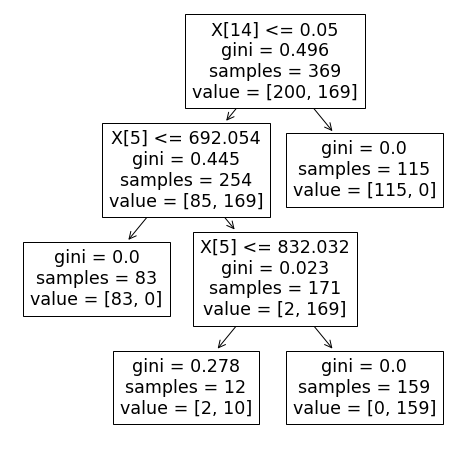

In [109]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split= 0.1, 
                                  min_samples_leaf = 10, random_state=123)
dtc.fit(X_train_c, y_train_c)
plt.figure(figsize=(8,8))
tree_plot = tree.plot_tree(dtc)

In [110]:
# children_left[i]: id of the left child of node i or -1 if leaf node
# children_right[i]: id of the right child of node i or -1 if leaf node
# feature[i]: feature used for splitting node i
# threshold[i]: threshold value at node i
# n_node_samples[i]: the number of of training samples reaching node i
# impurity[i]: the impurity at node i

n_nodes = dtc.tree_.node_count
children_left = dtc.tree_.children_left
children_right = dtc.tree_.children_right
feature = dtc.tree_.feature
threshold = dtc.tree_.threshold
impurity = dtc.tree_.impurity

We can interpret the tree construction rules:

In [111]:
i = 3 # tree split node index
print("node= {node} is a split node: go to node {left} if X[:, {feature}] <= {threshold} "
      "else to node {right}.".format(
          node=i,
          left=children_left[i],
          feature=feature[i],
          threshold=threshold[i],
          right=children_right[i]))

node= 3 is a split node: go to node 4 if X[:, 5] <= 832.0322265625 else to node 5.


A better visualization of graph:

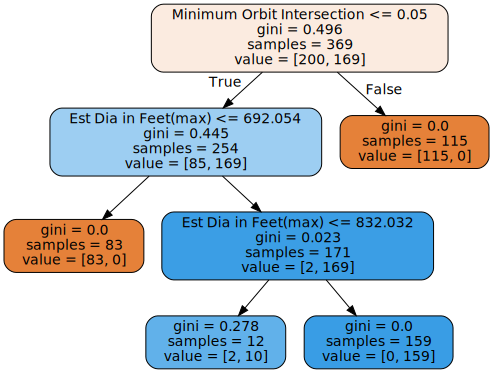

In [112]:
import graphviz 
 
dot_data = tree.export_graphviz(dtc, out_file=None, 
                    feature_names=X_train_c.columns,   
                    filled=True, rounded=True, fontname="calibri")  
graph = graphviz.Source(dot_data)  
graph 

Predictions on test set:

In [113]:
probs = dtc.predict_proba(X_test_c)
y_pred_c = dtc.predict(X_test_c)

acc_tree = dtc.score(X_test_c, y_test_c)
print(f"Accuracy with decision tree model: {acc_tree}")

confusion = metrics.confusion_matrix(y_test_c, y_pred_c)
print(f"Confusion matrix with decision tree model: {confusion}")

Accuracy with decision tree model: 1.0
Confusion matrix with decision tree model: [[42  0]
 [ 0 51]]


### Decision Trees for regression (forecasting):

In [118]:
dtr = tree.DecisionTreeRegressor(criterion="squared_error", max_depth=4, min_samples_split= 0.1,
                                 min_samples_leaf = 10, random_state=123)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, min_samples_split=0.1,
                      random_state=123)

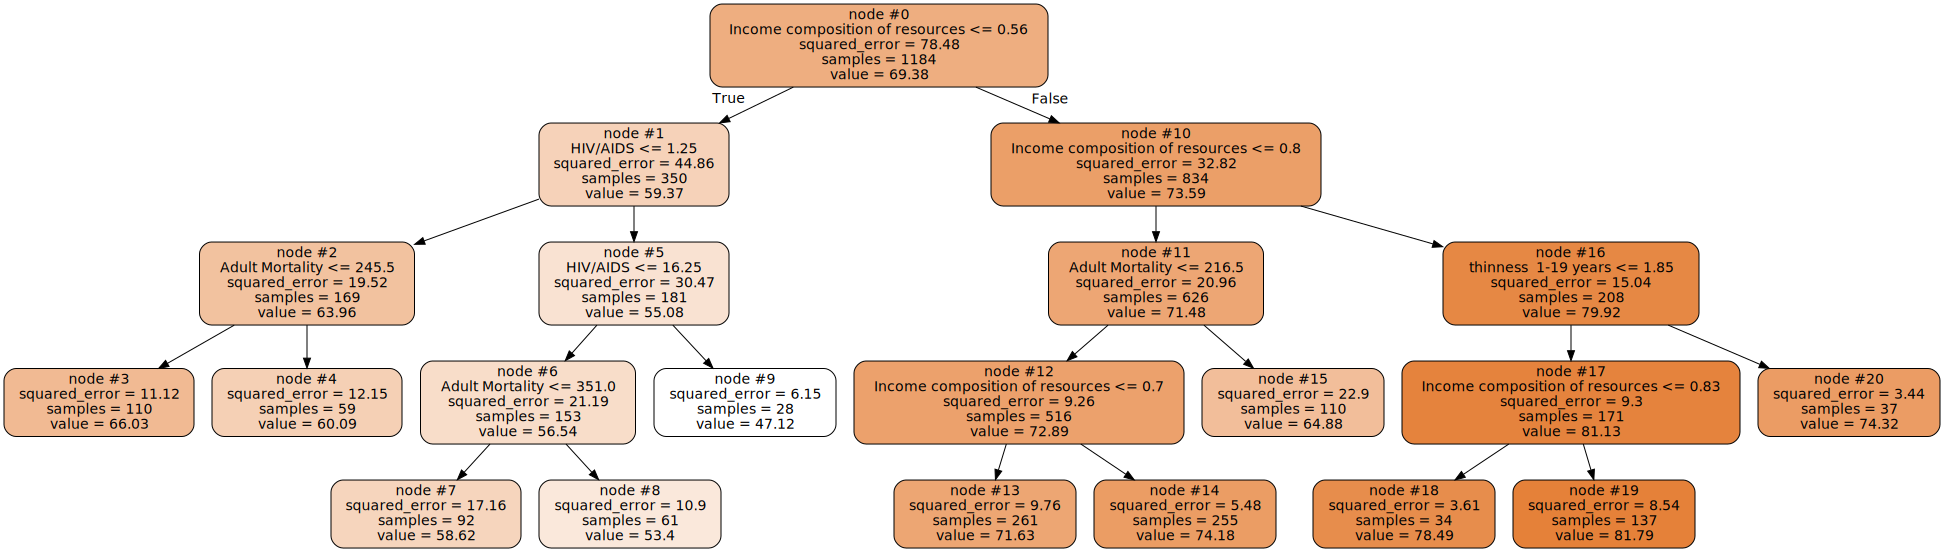

In [120]:
dot_data = tree.export_graphviz(dtr, out_file=None, feature_names=X_train.columns,
                    node_ids= True, precision=2,   
                    filled=True, rounded=True, fontname="calibri")  


graph = graphviz.Source(dot_data)

import pydotplus
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('regression_tree.png')
graph


In [121]:
y_pred = dtr.predict(X_test)

mse = metrics.mean_squared_error(y_pred, y_test)
print(f"MSE with decision tree model: {mse}")

mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE with decision tree model: {mape}")

MSE with decision tree model: 9.386691205184329
MAPE with decision tree model: 0.03425118268107095
